In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('data.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Cleaning

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


### EDA

<ipython-input-57-f1c5b52ad20a>:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=2.0)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


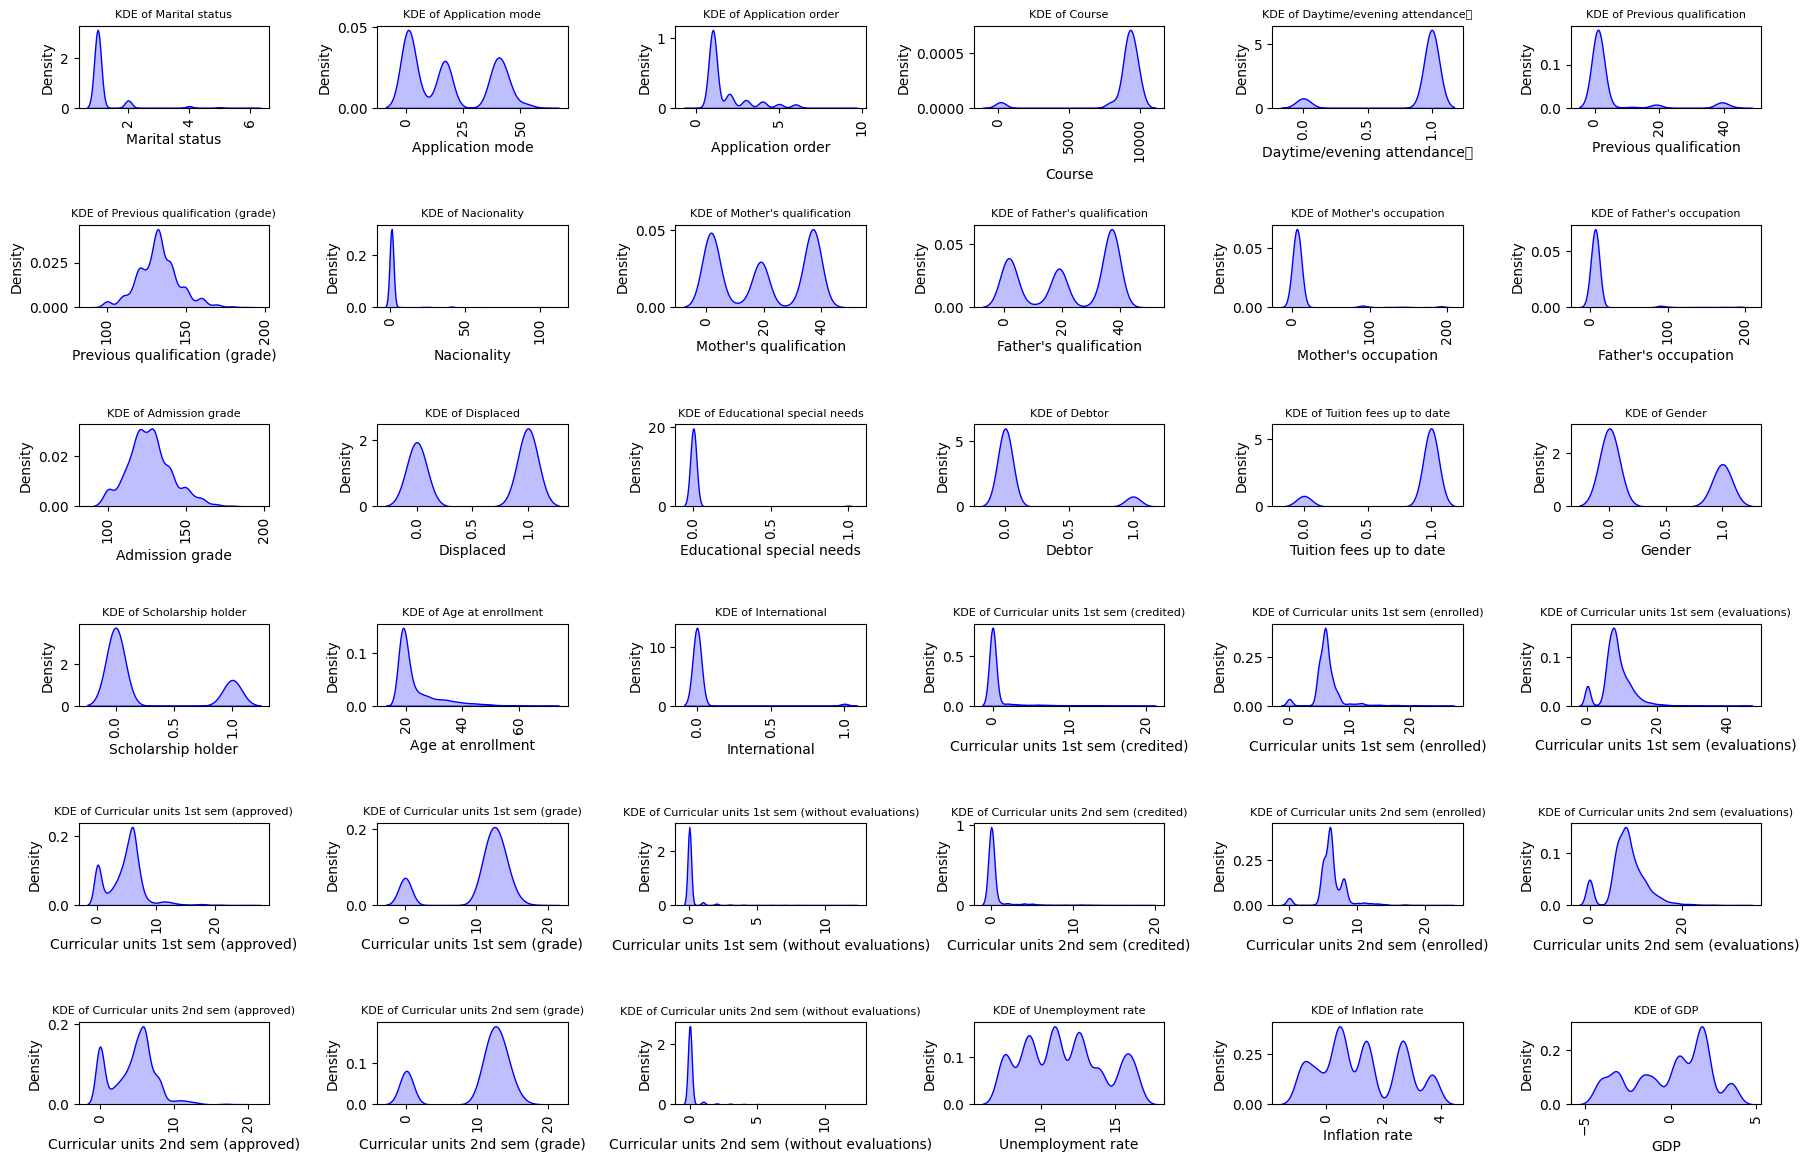

In [ ]:
features = data.drop('Target', axis=1).columns

# KDE Plot
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
  plt.subplot(6, 6, i + 1)
  sns.kdeplot(data[feature], fill=True, color='blue')
  plt.title(f'KDE of {feature}', fontsize=8)
  plt.xticks(rotation=90)

plt.tight_layout(pad=2.0)
plt.show()

<ipython-input-56-335b7bf30c0e>:9: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=2.0)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


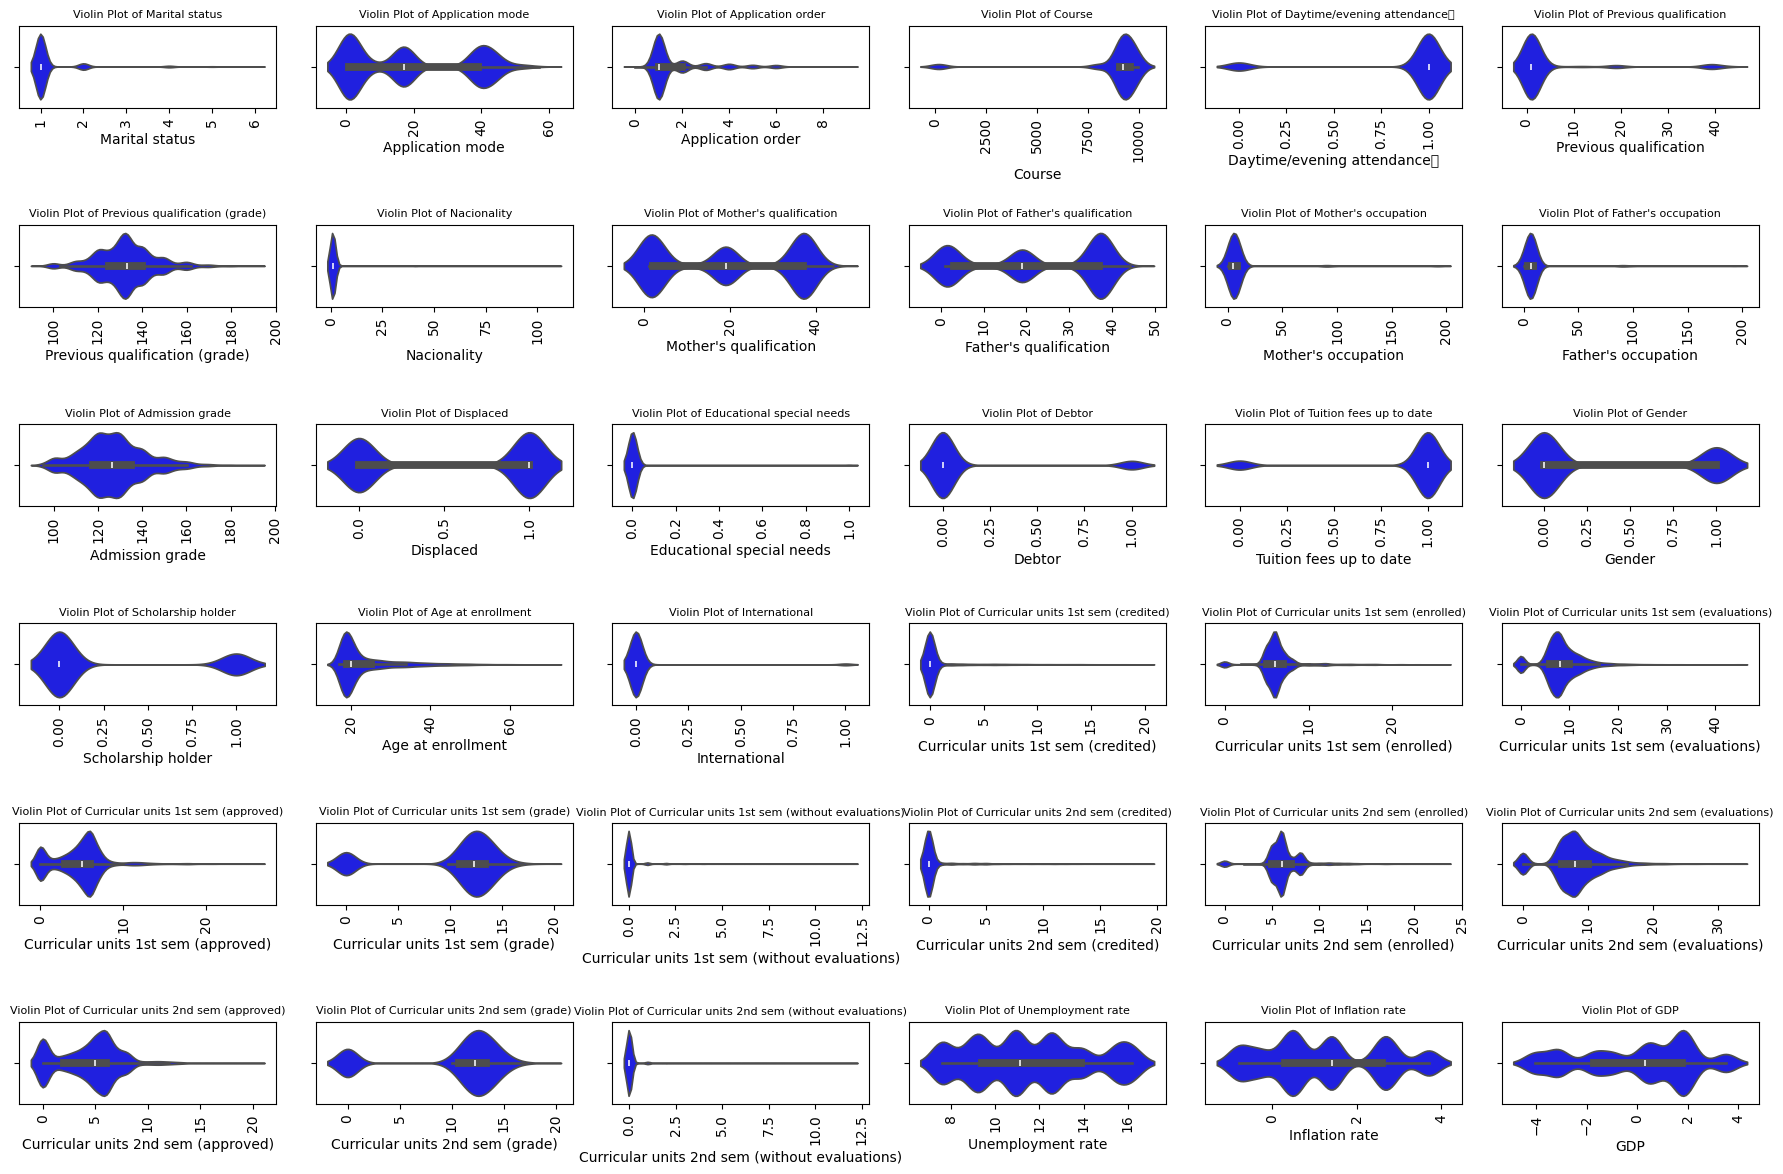

In [ ]:
# Violion Plot
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
  plt.subplot(6, 6, i + 1)
  sns.violinplot(x=data[feature], color='blue')
  plt.title(f'Violin Plot of {feature}', fontsize=8)
  plt.xticks(rotation=90)

plt.tight_layout(pad=2.0)
plt.show()

<ipython-input-113-fe518ddd40e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Target'], palette='Set2')


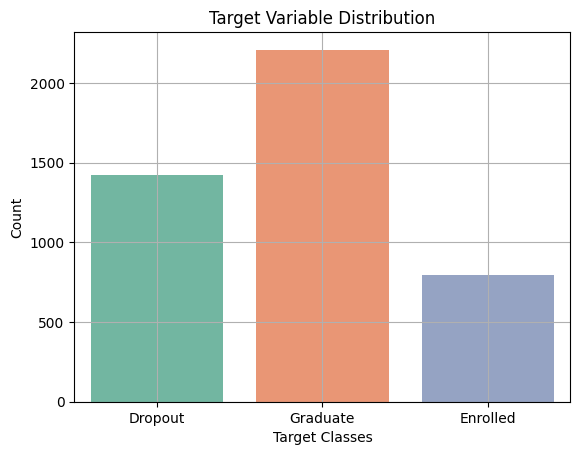

In [ ]:
# bar chart
sns.countplot(x=data['Target'], palette='Set2')
plt.title('Target Variable Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


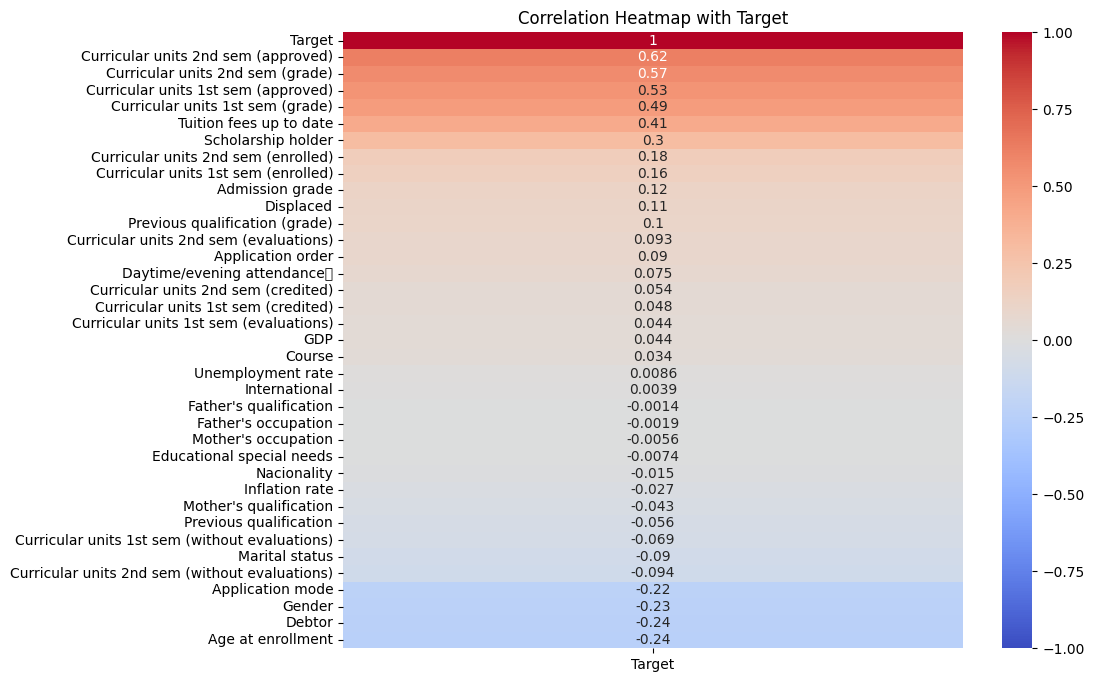

In [ ]:
# correlation heatmap
correlation_matrix = data.corr()
target_corr = correlation_matrix['Target'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap with Target")
plt.show()

In [ ]:
columns_to_drop = target_corr[target_corr.abs() < 0.01].index
data_cleaned = data.drop(columns=columns_to_drop)
print(f"Number of columns: {data_cleaned.shape[1]}")

Number of columns: 31


### Data Preparation

Reduced from 30 features to 18 principal components.


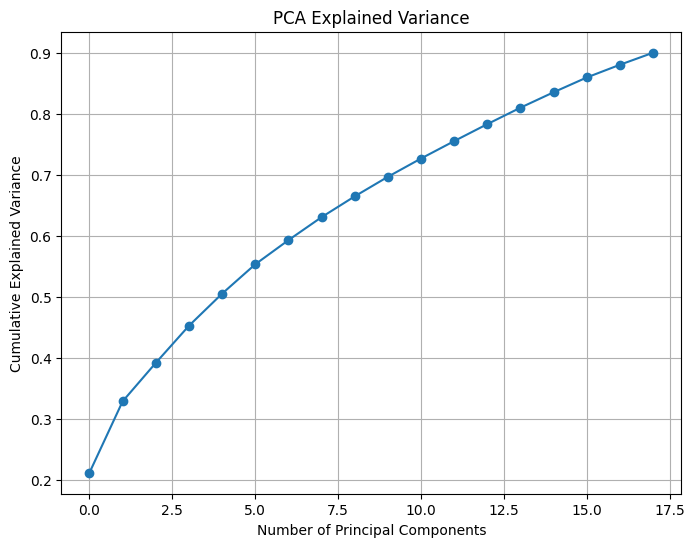

In [ ]:
# Encoding categorical variable
le = LabelEncoder()
data_cleaned['Target'] = le.fit_transform(data_cleaned['Target'])

# Standardizing the values
X = data_cleaned.drop('Target', axis=1)
y = data_cleaned['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)
print(f"Reduced from {X.shape[1]} features to {X_reduced.shape[1]} principal components.")

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


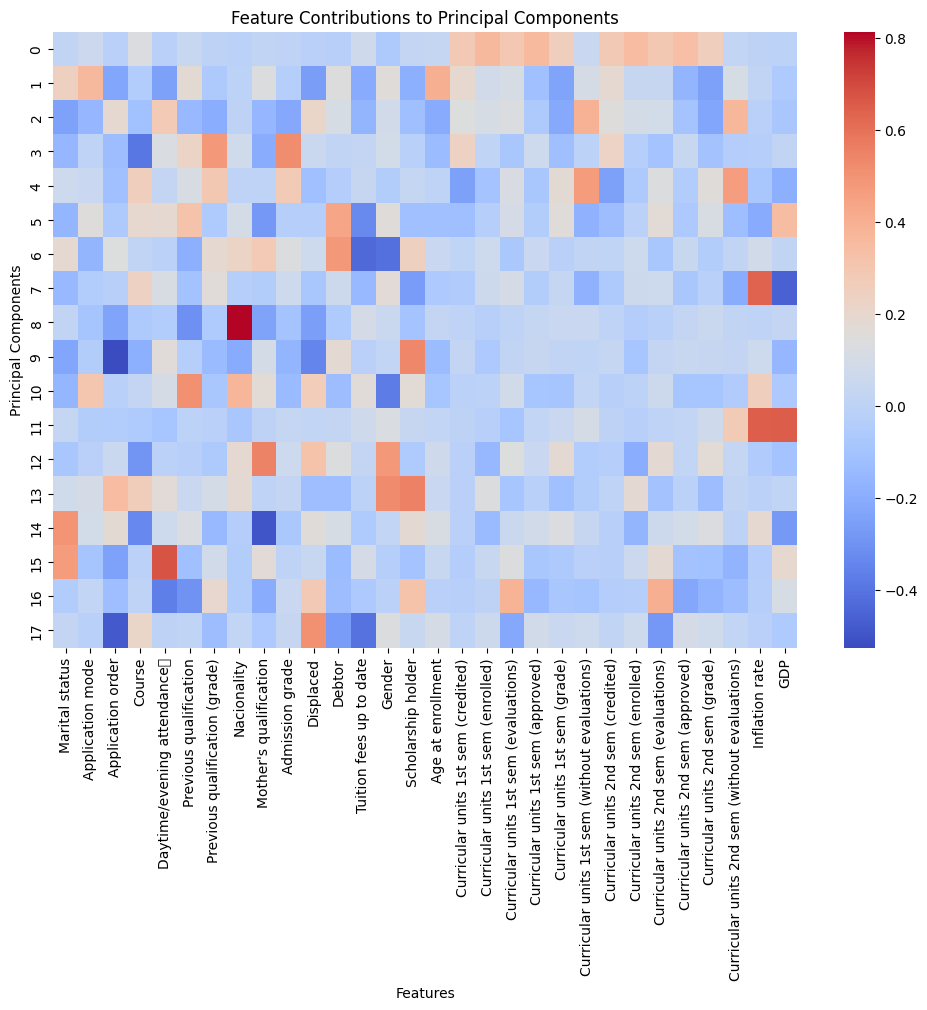

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=X.columns)
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, cmap='coolwarm')
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.grid(False)
plt.show()

### Model Training

In [ ]:
# using dataset after PCA
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Training Naive Bayes...
Accuracy: 0.6757062146892655
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       316
           1       0.36      0.25      0.29       151
           2       0.72      0.85      0.78       418

    accuracy                           0.68       885
   macro avg       0.60      0.58      0.58       885
weighted avg       0.66      0.68      0.66       885



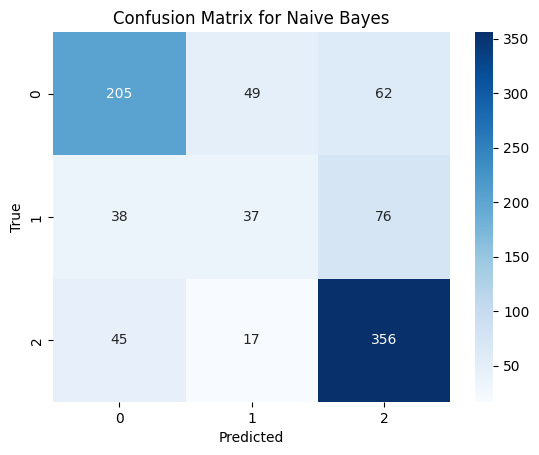

In [ ]:
# Naive Bayes
NB_model = GaussianNB()
print(f"Training Naive Bayes...")
NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)
nb_acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {nb_acc}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Training Logistic Regression...
Accuracy: 0.7242937853107345
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       316
           1       0.39      0.24      0.30       151
           2       0.73      0.92      0.81       418

    accuracy                           0.72       885
   macro avg       0.65      0.62      0.62       885
weighted avg       0.71      0.72      0.71       885



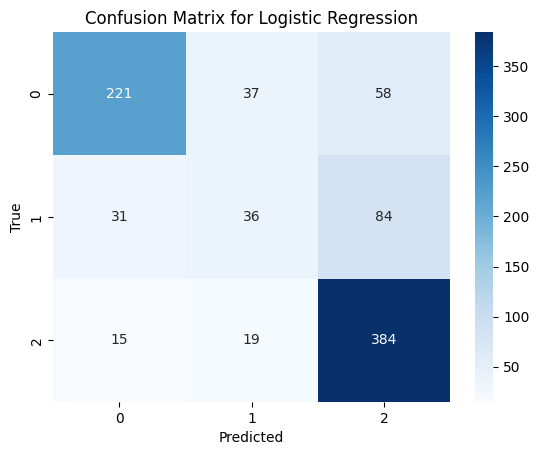

In [ ]:
# Logistic Regression
LR_model = LogisticRegression(max_iter=1000)
print(f"Training Logistic Regression...")
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_acc}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Training Decision Tree...
Accuracy: 0.6237288135593221
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       316
           1       0.25      0.29      0.27       151
           2       0.72      0.75      0.73       418

    accuracy                           0.62       885
   macro avg       0.56      0.55      0.55       885
weighted avg       0.64      0.62      0.63       885



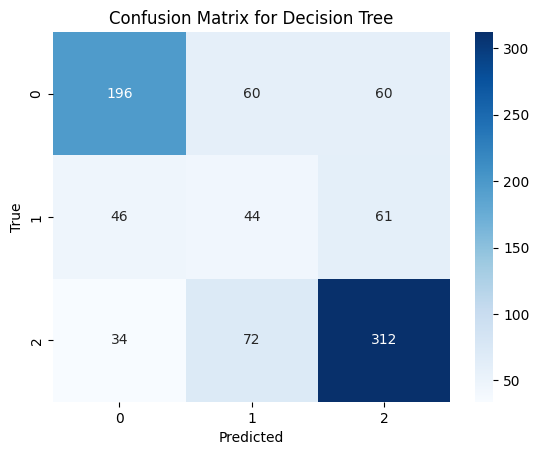

In [ ]:
# Decision Tree
DT_model = DecisionTreeClassifier()
print(f"Training Decision Tree...")
DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_acc}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Training KNN...
Accuracy: 0.6926553672316385
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       316
           1       0.32      0.26      0.29       151
           2       0.72      0.85      0.78       418

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.60       885
weighted avg       0.68      0.69      0.68       885



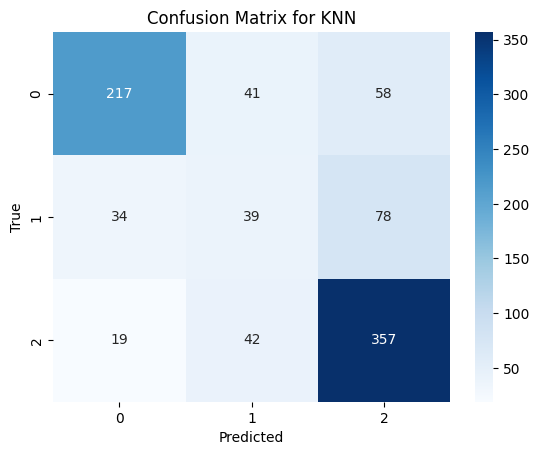

In [ ]:
# KNN
KNN_model = KNeighborsClassifier()
print(f"Training KNN...")
KNN_model.fit(X_train, y_train)

y_pred = KNN_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_acc}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for KNN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Training SVM...
Accuracy: 0.7593220338983051
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       316
           1       0.53      0.34      0.42       151
           2       0.74      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.76      0.76      0.75       885



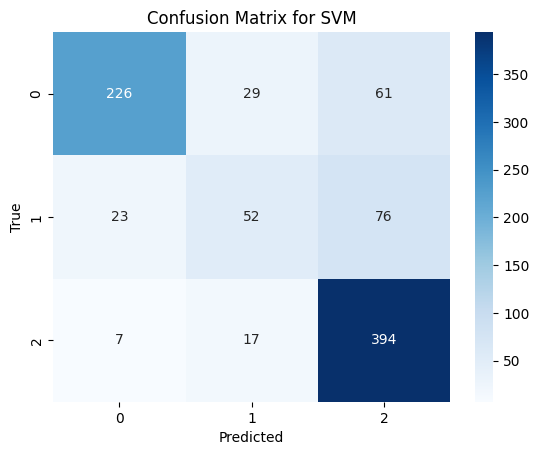

In [ ]:
# SVM
SVM_model = SVC(probability=True)
print(f"Training SVM...")
SVM_model.fit(X_train, y_train)

y_pred = SVM_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_acc}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for SVM")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

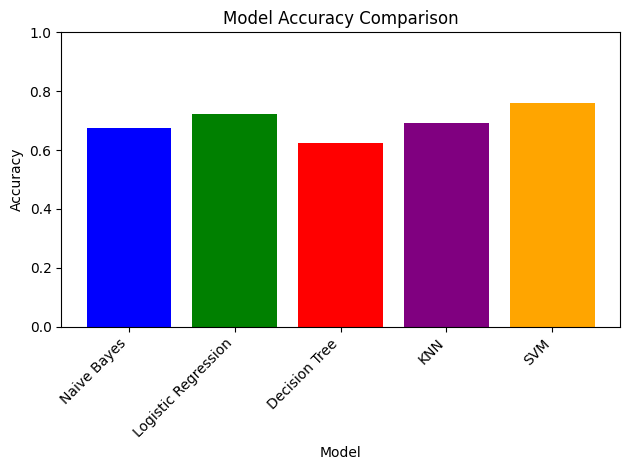

In [ ]:
# Bar chart comparing accuracies
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
accuracies = [nb_acc, lr_acc, dt_acc, knn_acc, svm_acc]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Training ensemble model...
Accuracy: 0.7480225988700565
Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       316
           1       0.47      0.28      0.36       151
           2       0.75      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.74      0.75      0.73       885



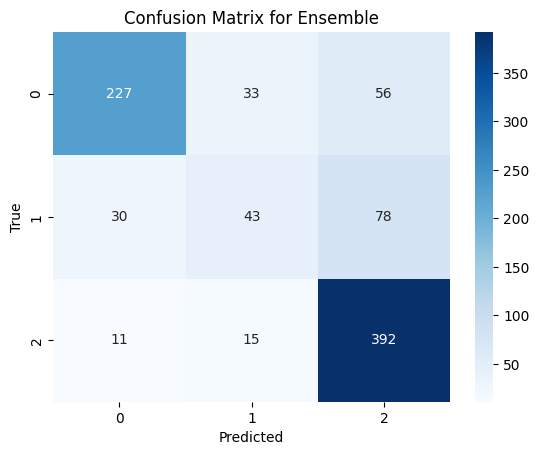

In [ ]:
# Create an ensemble of the best performing models using a VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('svm', SVM_model),
    ('lr', LR_model),
    ('knn', KNN_model)
], voting='hard')

print("Training ensemble model...")
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble)}")
print("Classification Report for Ensemble:")
print(classification_report(y_test, y_pred_ensemble))

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Ensemble")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

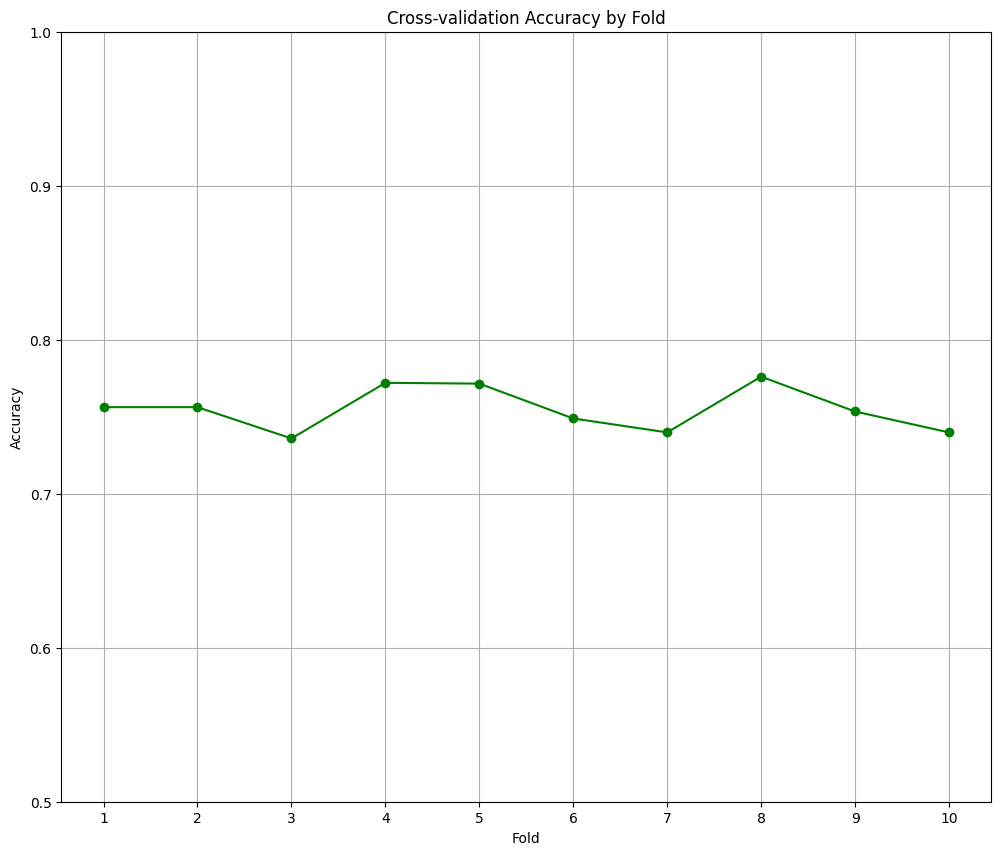

In [ ]:
# Perform cross-validation on the ensemble
cv_scores = cross_val_score(ensemble, X_reduced, y, cv=10)

plt.figure(figsize=(12, 10))
plt.plot(range(1, 11), cv_scores, marker='o', color='green', linestyle='-', label='Cross-validation Accuracy')
plt.title('Cross-validation Accuracy by Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 11))
plt.ylim(0.5, 1.0)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# find most important principal components
pc_labels = [f"PC{i+1}" for i in range(X_train.shape[1])]
result = permutation_importance(ensemble, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Principal Component': pc_labels,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
1      PC2    0.171977
0      PC1    0.082260
2      PC3    0.044859
7      PC8    0.026780
16    PC17    0.024746
5      PC6    0.018870
3      PC4    0.015141
13    PC14    0.012090
14    PC15    0.011073
10    PC11    0.010395
15    PC16    0.010056
12    PC13    0.008588
17    PC18    0.004633
6      PC7    0.004294
9     PC10    0.004068
4      PC5    0.003164
8      PC9    0.002599
11    PC12    0.002260


<ipython-input-107-f15f5e8c5b15>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=final_importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


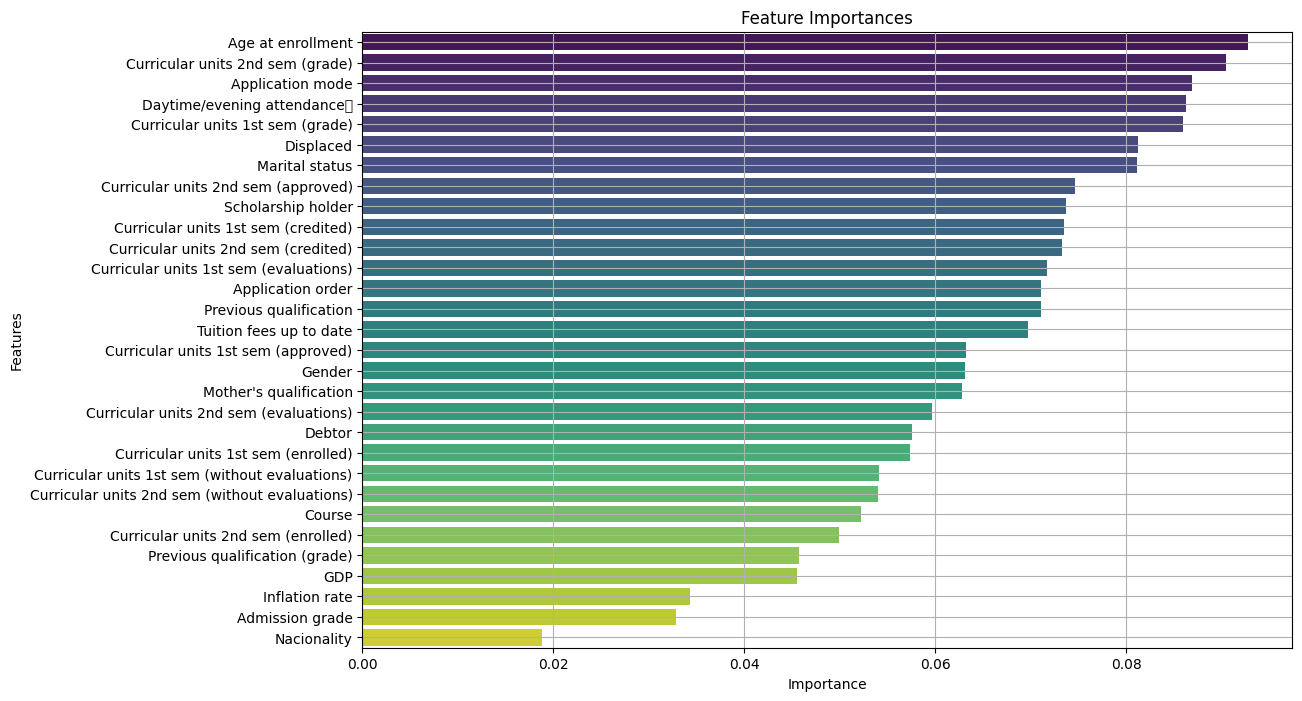

In [ ]:
# Find weighted importance for each original feature

loadings_abs = loadings_df.abs()
feature_importances = loadings_abs.T.dot(importance_df['Importance'])

final_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
final_importance_df = final_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=final_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()